# Import Packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


# Load Data

In [11]:
iris = sns.load_dataset('iris')

# Data Wrangling

In [12]:
x = iris.drop('species', axis=1)
y = iris['species']

# Train Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)



# Number of Estimators

In [2]:
#The first thing you want to do is determine how many trees you should be using, which is the number of estimators.
# The code below will help you find the best number of estimators based on the accuracy of the model. 
# Remember that an accuracy of 1 is the highest you can get, so the closer you get to one, the better.

# You can create an array that contains the most likely number of estimators, which is what is shown in the 
 #first line. While you could put any numbers in this array, these typically get used frequently in ML. 
    # Then you'll create an empty list named results that will end up filled using a for loop!

 # And lastly, on to the for loop itself! This iterates over your n_estimators_array and creates a random forest
 #for each, prints out the accuracy for each, and finally adds it to your results list. So you don't have to 
    # test everything manually! The very last line in the for loop prints out each result as it becomes available. 
    # Depending on how fast your computer is, this code may take a minute (you are doing 11 random forests,
    # after all!) and you can see the results come up in real time. Pretty cool!



In [14]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.9111111111111111
4 : 0.9555555555555556
5 : 0.9333333333333333
8 : 0.9555555555555556
10 : 0.9777777777777777
20 : 0.9555555555555556
50 : 0.9555555555555556
75 : 0.9555555555555556
100 : 0.9555555555555556
250 : 0.9555555555555556
500 : 0.9555555555555556


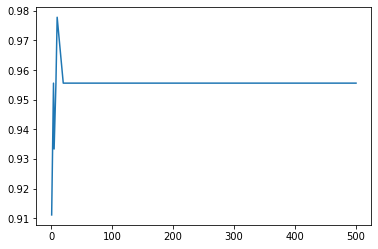

In [15]:
# So it looks like the best accuracy arises when you use only 10 trees instead of the standard 500! Good to know.

# If you wanted a visual representation of this, that can be done too with your good old plt() function!

plt.plot(n_estimators_array, results)

In [ ]:
#You really get a sense from this graph that things have completely stagnated before 100 trees, 
# so it certainly is a waste of processing power to request 500!



# Tuning the Remaining Three

In [ ]:
# there is an easier way to find the best hyperparameter values without having to go through each.
# You can automate it and find em' all in one whack with the RandomizedSearchCV library. 
# Although you'll be doing this just with random forests right now, this library will work with any algorithm 
# in the sklearn library!They've thrown in cross-validation for the accuracy calculations as well!

# Below you are creating lists with all the hyperparameter values you want to trial. 
# There is one for each of the remaining three features, named: max_features, max_depth, and min_samples_leaf. 
# Then, you'll create a dictionary with the hyperparameter names as the keys and the list variables as the values.
# This is called a grid and is aptly named random_grid.



In [16]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [17]:
# So nothing has actually happened yet - but you're prepared for the next move, which is to initialize one
# random forest for every one of those hyperparameters in the random_grid. Since you know that you only want
# ten trees, the first line sets up a random forest model with that.

# The next line of code gives you a random search of the random_grid you created using the function 
# RandomizedSearchCV(). The arguments for that function include the estimator=, which is what you've named 
# your latest iteration of the random forest with only ten estimators, the param_distributions= argument, 
# which is where you plug in the random_grid dictionary, n_iter=, which is the number of iterations, or times to
# complete the random forest, and lastly, the cv= argument, which allows you to choose how many folds you'd 
# like in your cross validation. The random_state= argument is not required to run code, but including it means 
# that your results should be the same as those in the lesson.

rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [18]:
# With that created, it's time to fit!

rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [19]:
# It basically just tells you what it did, which is not particularly helpful. 
# What would be helpful is knowing which hyperparameter produced the best accuracy. But that isn't possible, is it?

# It is! Try this line of code out!

rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50}

In [ ]:
# This means that the model with the best accuracy has at least 4 samples per leaf, leaves the max features setting on auto, and has a maximum depth of 30 decision points. Pretty nifty! Now all you need to do is run one last random forest that actually has those parameters! This is relatively plug-and-play here, since in your random grid search code, you used approximately the same names.

In [20]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=4, max_features="auto", max_depth=30)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=10)

In [ ]:
# Running the above code just tells you the details of the model:

In [21]:
RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=10)


RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=10)

In [ ]:
# But if you want the details you can use the same prediction and classification report info as before, but with your new and improved model:

In [22]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.85      0.88        13
   virginica       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
# Looking good here! Overall accuracy is 95% weighted.

# Next Lesson - Feature Importance

## Feature Importance

In [23]:
# determining the feature importance just means that you can figure out which variable makes more difference 
# to the prediction of the y.

# Feature Importance in Python
# It's a pretty quick and easy line of code to get feature importance! 
# They are outputs of your model, and so you just need to call them in a format that is useful.
# You'll create a new variable called feature_importances that is formatted as a pandas series, using the 
# function pd.Series(). Then, you can call forest.feature_importances_, which by default is created when you 
# run forest. Lastly, for readability, you can index it with the argument index= and put in x.columns so that 
# the name of the column names in your dataset show on the left.

feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

sepal_length    0.133700
sepal_width     0.007244
petal_length    0.655831
petal_width     0.203225
dtype: float64

In [24]:
# The bigger, the better for feature importance. Wouldn't it be nice to see each of them in order of 
# feature importance, rather than in column order? Well, that can be arranged! The sort_values()
# function will sort them. The inplace=True argument, like always, makes this change permanent, and 
 #ascending=False means that this goes from largest to smallest, which is exactly what you'd like to see!
    
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

petal_length    0.655831
petal_width     0.203225
sepal_length    0.133700
sepal_width     0.007244
dtype: float64


In [ ]:
# But wait! There's more! If you're someone visual, you can also graph this. 

<AxesSubplot:>

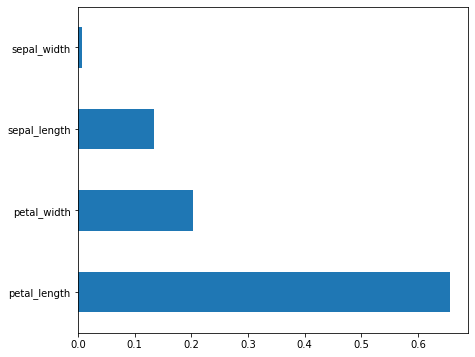

In [25]:
feature_importances.plot(kind='barh', figsize=(7,6))